In [64]:

"""Importing the libraries"""
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy
import time
from sklearn.metrics import make_scorer




In [41]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [42]:
"""Importing the dataset"""

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')
test_cup = pd.read_csv('../data/ML-CUP20-TS.csv')

In [43]:
"""Splitting the dataset into the Training set and Test set"""

train_x = train_df.iloc[:, :-2].to_numpy()
train_y = train_df.iloc[:, [10, 11]].to_numpy()


In [44]:
(x_dev, x_test, y_dev, y_test) = train_test_split(train_x, train_y,
        test_size=0.25, random_state=30)
(x_train, x_val, y_train, y_val) = train_test_split(x_dev, y_dev,
        test_size=0.25, random_state=30)

In [37]:
chin_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                    with_std=True)), ('estimator',
                    RegressorChain(SVR(kernel='rbf', C=0.1,
                    gamma='scale', epsilon=0.1)))])

In [56]:
chinesvr_params = {
    'estimator__base_estimator__kernel': ['rbf'],
    'estimator__base_estimator__gamma': [0.0001, 0.001, 0.01, 0.1],
    'estimator__base_estimator__C': np.logspace(-3, 2, 6).tolist(),
    'estimator__base_estimator__epsilon': np.logspace(-3, 2, 6).tolist(),
    }



In [ ]:
print("Mean\tSTD\tParams")
means = grid_result.cvr_esults_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in sorted(zip(means, stds, params)):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [65]:
mee = make_scorer(mean_euclidean_error, greater_is_better=False)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    5.5s finished


Mean	STD	Params
-16.711052 (0.214539) with: {'estimator__base_estimator__C': 0.001, 'estimator__base_estimator__epsilon': 0.001, 'estimator__base_estimator__gamma': 0.0001, 'estimator__base_estimator__kernel': 'rbf'}
-16.705231 (0.214666) with: {'estimator__base_estimator__C': 0.001, 'estimator__base_estimator__epsilon': 0.001, 'estimator__base_estimator__gamma': 0.001, 'estimator__base_estimator__kernel': 'rbf'}
-16.661009 (0.215026) with: {'estimator__base_estimator__C': 0.001, 'estimator__base_estimator__epsilon': 0.001, 'estimator__base_estimator__gamma': 0.01, 'estimator__base_estimator__kernel': 'rbf'}
-16.615414 (0.215015) with: {'estimator__base_estimator__C': 0.001, 'estimator__base_estimator__epsilon': 0.001, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'}
-16.710990 (0.214859) with: {'estimator__base_estimator__C': 0.001, 'estimator__base_estimator__epsilon': 0.01, 'estimator__base_estimator__gamma': 0.0001, 'estimator__base_estimator__ke

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


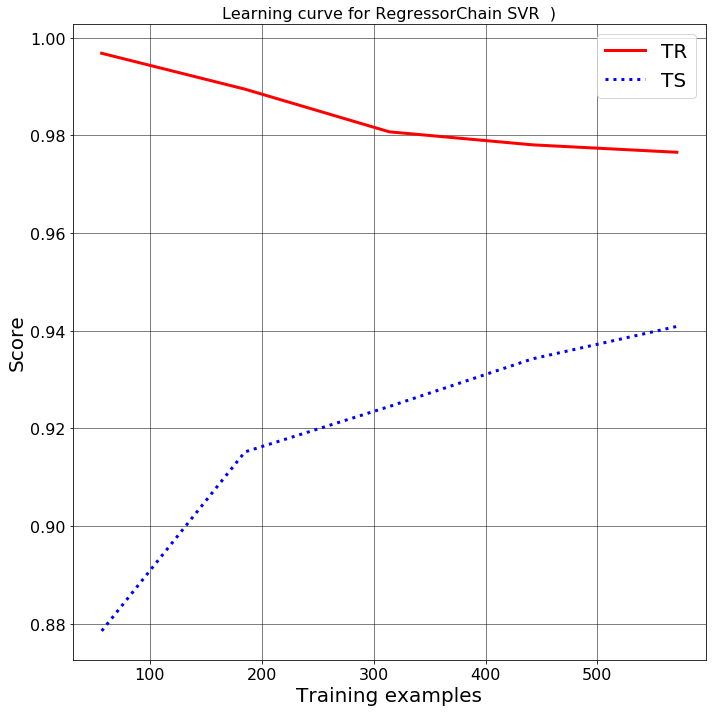

In [86]:
""" Gridsearch and Learning curve"""
start = time.time()
for i in range(1):
    Grid = GridSearchCV(
        estimator=chin_svr,
        param_grid=chinesvr_params,
        scoring = mee,
        n_jobs=-1,
        cv=3,
        verbose=1,
        ).fit(x_train, y_train)
    
    
    print("Mean\tSTD\tParams")
    means = Grid.cv_results_['mean_test_score']
    stds = Grid.cv_results_['std_test_score']
    params = Grid.cv_results_['params']
    
    for mean, stdev, param in  (zip(means, stds, params)):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred = Grid.predict(x_val)
    y_pred_train = Grid.predict(x_train)
    y_tpred = Grid.predict(x_test)
    (train_sizes, train_scores, test_scores) = \
        learning_curve(Grid.best_estimator_, x_train, y_train, cv=3,
                       n_jobs=-1)
    df = pd.DataFrame(list(zip(means, stds, params)),  columns =['means', 'stds', 'params']).sort_values(by=['means'])
    df
    print(f"Best parameters:{Grid.best_params_}")
    print(f"Best training accuracy:{Grid.best_score_}")
    print(f"VR dataset accuracy score for best params:{r2_score(y_val, y_pred)}" )
    print(f"Mean_euclidean_error for VR dataset :{mean_euclidean_error(y_val, y_pred)}" )
    print(f"Mean_euclidean_error for TR dataset :{mean_euclidean_error(y_train, y_pred_train)}" )
    print(f"Mean_euclidean_error for TS dataset :{mean_euclidean_error(y_test, y_tpred)}" )
    print(f"Best model :{Grid.best_estimator_}")
    end = time.time()
    print(f"Total time :{end - start}")
    (fig, ax) = plt.subplots(1, figsize=(10, 10))
    ax.grid(linestyle='-', linewidth='0.5', color='black')
    ax.set_axisbelow(True)
    plt.plot(train_sizes, train_scores_mean,
             label='TR', linewidth=3.0, ls='solid', c='red')

    plt.plot(train_sizes, test_scores_mean,
             label='TS', linewidth=3.0, ls='dotted', c='blue')
    plt.title(f"Learning curve for RegressorChain SVR  )",fontsize=16)
    plt.xlabel('Training examples',fontsize=20)
    plt.ylabel('Score',fontsize=20)
    plt.legend(loc='Best',prop={"size":20})
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.tight_layout()
    plt.savefig('KNN')
    plt.show()

In [76]:
 df.iloc[131].params

{'estimator__base_estimator__C': 1.0,
 'estimator__base_estimator__epsilon': 0.1,
 'estimator__base_estimator__gamma': 0.1,
 'estimator__base_estimator__kernel': 'rbf'}

In [ ]:
np.logspace(-3, 2, 6)

In [ ]:
np.logspace(-3, 2, 6)

In [75]:
df

,means,stds,params
71,-19.113370,0.026325,"{'estimator__base_estimator__C': 0.1, 'estimat..."
44,-19.113370,0.026325,"{'estimator__base_estimator__C': 0.01, 'estima..."
45,-19.113370,0.026325,"{'estimator__base_estimator__C': 0.01, 'estima..."
46,-19.113370,0.026325,"{'estimator__base_estimator__C': 0.01, 'estima..."
47,-19.113370,0.026325,"{'estimator__base_estimator__C': 0.01, 'estima..."
...,...,...,...
103,-3.409289,0.098660,"{'estimator__base_estimator__C': 10.0, 'estima..."
123,-3.403059,0.192220,"{'estimator__base_estimator__C': 100.0, 'estim..."
127,-3.401634,0.191545,"{'estimator__base_estimator__C': 100.0, 'estim..."
107,-3.397486,0.089443,"{'estimator__base_estimator__C': 10.0, 'estima..."


In [77]:
prova = [
    {'estimator__base_estimator__C': 100.0, 'estimator__base_estimator__epsilon': 0.1, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'},
    {'estimator__base_estimator__C': 10.0, 'estimator__base_estimator__epsilon': 0.1, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'},
    {'estimator__base_estimator__C': 100.0, 'estimator__base_estimator__epsilon': 0.01, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'},
    {'estimator__base_estimator__C': 100.0, 'estimator__base_estimator__epsilon': 0.001, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'}
    ]

In [82]:
mean_tr_loss = []
mean_vl_loss = [3.391483 , 3.397486, 3.401634, 3.403059]
mean_ts_loss = []

In [80]:
chin_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                    with_std=True)), ('estimator',
                    RegressorChain(SVR(C=10.0, cache_size=200,
                                                   coef0=0.0, degree=3,
                                                   epsilon=0.1, gamma=0.1,
                                                   kernel='rbf', max_iter=-1,
                                                   shrinking=True, tol=0.001,
                                                   verbose=False)))]).fit(x_train, y_train, validation_data=(x_test, y_test))

ValueError: Pipeline.fit does not accept the validation_data parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.

In [83]:
for params in prova:
    chin_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                        with_std=True)), ('estimator',
                        RegressorChain(SVR(C=params['estimator__base_estimator__C'], cache_size=200,
                                                       coef0=0.0, degree=3,
                                                       epsilon=params['estimator__base_estimator__epsilon'], gamma=params['estimator__base_estimator__gamma'],
                                                       kernel=params['estimator__base_estimator__kernel'], max_iter=-1,
                                                       shrinking=True, tol=0.001,
                                                       verbose=False)))]).fit(x_train, y_train)
    train_pred = chin_svr.predict(x_train)
    mean_tr_loss.append(mean_euclidean_error(train_pred, y_train))
    internal_test_pred = chin_svr.predict(x_test)
    mean_ts_loss.append(mean_euclidean_error(internal_test_pred, y_test))

In [84]:
print("mean_tr_loss\tmean_vl_loss\tmean_ts_loss")
for tr_loss, vl_loss, ts_loss in zip(mean_tr_loss, mean_vl_loss, mean_ts_loss):
    print("%f (%f) with: %f" % (tr_loss, vl_loss, ts_loss))

mean_tr_loss	mean_vl_loss	mean_ts_loss
1.696402 (3.391483) with: 3.165636
2.520116 (3.397486) with: 3.065184
1.641912 (3.401634) with: 3.201590
1.637049 (3.403059) with: 3.206134
